## Extending to four Component PR EOS

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.cm as cm # matplotlib's color map library
#rcParams['figure.figsize'] = 18.75, 18.75
from scipy import stats
import seaborn as sns
from scipy.interpolate import griddata
import pr_z_v5 as pr_z
R, mwAir, degF2R = 10.731577089016, 28.97, 459.67

import importlib
importlib.reload(pr_z)
import pyrestoolbox as rtb

In [2]:
pr_z.tc_pc(0.6)

(355.17484623999997, 657.88938076)

In [3]:
degf, psia, sg, co2, h2s, n2 = 220, 15000, 0.6, 0.0, 0, 0
z = pr_z.peng_robinson_z(degf, psia, sg, co2=co2, h2s=h2s, n2=n2)
vis = pr_z.lbc(z, degf, psia, sg, co2=co2, h2s=h2s, n2=n2)
z, vis

(1.803979721603843, 0.0416062577133254)

In [4]:
def Zplots(component, psat_coefics):
    rcParams['figure.figsize'] = 9, 9

    plt.plot(Zs, calc_Zs, 'o')
    plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
    plt.title(component+' Calculated Z-Factor vs GERG2008')
    plt.xlabel('GERG2008 Z-Factor')
    plt.ylabel('Calculated Z-Factor')
    plt.grid()
    plt.savefig(component+'_1.png')
    plt.show()
    errs = np.abs(calc_Zs - Zs)/Zs
    print('Average Relative error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    errs = (calc_Zs - Zs)/Zs
    plt.plot(Zs, errs, 'o')
    plt.title(component+' Relative Error in Calculated Z-Factor')
    plt.xlabel('GERG2008 Z-Factor')
    plt.ylabel('(Calculated-Z - GERG2008-Z)/GERG2008-Z')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    plt.savefig(component+'_2.png')
    plt.show()
    
    #fig, ax = plt.subplots()
    #res = stats.probplot(errs, plot=ax)
    #ax.set_title('Normal Probability Plot of '+component+' Residuals')
    #ax.set_xlabel('Theoretical Quantiles')
    #ax.set_ylabel('Ordered Values')
    #plt.show()

    x = degfs
    y = psias
    z = errs
    
    tc, a0, a1, a2, a3 = psat_coefics
    tsat = np.arange(x[0], tc, 0.1)
    psat = a0*tsat**3+a1*tsat**2+a2*tsat+a3
    pc = a0*tc**3+a1*tc**2+a2*tc+a3

    # target grid to interpolate to
    yi = np.arange(15,15000,20)
    xi = np.arange(50, 300, 5)
    xi,yi = np.meshgrid(xi,yi)

    # interpolate
    zi = griddata((x,y), z, (xi,yi),method='linear')

    rcParams['figure.figsize'] = 11, 9
    fig, ax = plt.subplots()
    #c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=zi.min(), vmax=zi.max())
    c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=-0.05, vmax=0.05)
    levels = np.arange(-0.05, 0.06, 0.01)
    CS = ax.contour(xi, yi, zi, levels=levels, linewidths=0.5, colors='k')
    ax.clabel(CS, inline=True, fontsize=10)

    ax.set_title(component+' Relative Error (Zcalc - Z_GERG) / Z_GERG')
    # set the limits of the plot to the limits of the data
    ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
    ax.set_ylabel('psia')
    ax.set_xlabel('degf')
    ax.set_ylim(0, 15000)
    ax.set_xlim(60, 300)
    
    plt.plot(tsat, psat, c='g')
    plt.plot([tc], [pc], 'o', c='g')
    
    #ax.set_ylim(0, 15)
    fig.colorbar(c, ax=ax)
    plt.savefig(component+'_3.png')
    plt.show()
    rcParams['figure.figsize'] = 9, 9

def molar_plots(component):
    rcParams['figure.figsize'] = 9, 9
    v = R*(degfs+degF2R)*Zs/psias
    v_calc = R*(degfs+degF2R)*calc_Zs/psias
    
    plt.plot(v, v_calc, 'o')
    plt.plot([min(v), max(v)], [min(v), max(v)], '--', c='k')
    plt.title(component+' Calculated Molar Volume vs GERG2008')
    plt.xlabel('GERG2008 Molar Volume (ft3/lbmol)')
    plt.ylabel('Calculated Molar Volume (ft3/lbmol)')
    plt.grid()
    #plt.savefig('co2.png')
    plt.show()
    errs = np.abs(v_calc - v)/v
    print('Average Relative error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    errs = (v_calc - v)/v
    plt.plot(v, errs, 'o')
    plt.title(component+' Relative Error in Calculated Molar Volumes')
    plt.xlabel('GERG2008 Molar Volume (ft3/lbmol)')
    plt.ylabel('(Calculated-Volume - GERG2008-Volume)/GERG2008-Volume')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    plt.savefig(component+'_4.png')
    plt.show()

    #x = degfs
    #y = psias
    #z = errs

    ## target grid to interpolate to
    #yi = np.arange(15,15000,20)
    #xi = np.arange(50, 300, 5)
    #xi,yi = np.meshgrid(xi,yi)

    ## interpolate
    #zi = griddata((x,y), z, (xi,yi),method='linear')

    #rcParams['figure.figsize'] = 11, 9
    #fig, ax = plt.subplots()
    ##c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=zi.min(), vmax=zi.max())
    #c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=-0.05, vmax=0.05)
    #levels = np.arange(-0.05, 0.06, 0.01)
    #CS = ax.contour(xi, yi, zi, levels=levels, linewidths=0.5, colors='k')
    #ax.clabel(CS, inline=True, fontsize=10)

    #ax.set_title(component+' Relative Error (Calculated-Volume - GERG2008-Volume)/GERG2008-Volume')
    ## set the limits of the plot to the limits of the data
    #ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
    #ax.set_ylabel('psia')
    #ax.set_xlabel('degf')
    #ax.set_ylim(0, 15000)
    #ax.set_xlim(60, 300)
    ##ax.set_ylim(0, 15)
    #fig.colorbar(c, ax=ax)
    
    #plt.show()
    #rcParams['figure.figsize'] = 9, 9

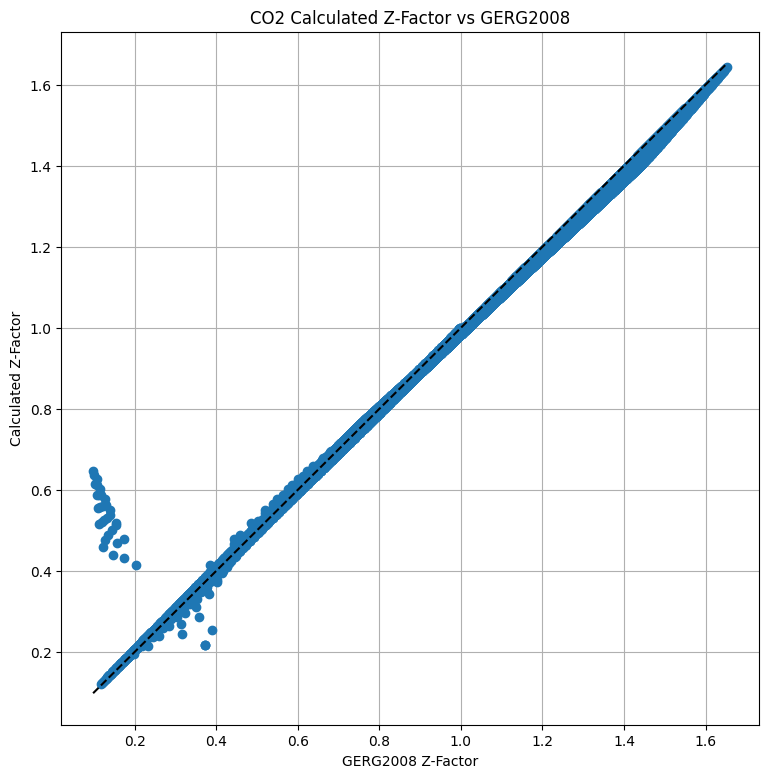

Average Relative error: 0.016240597736604804
95% of data better than error: 0.024905711283333538


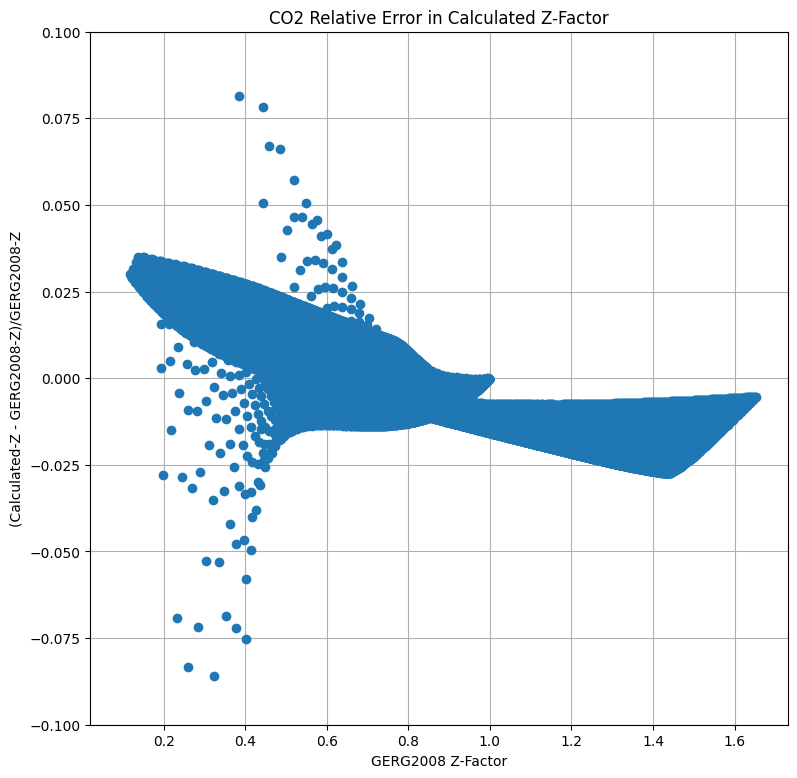

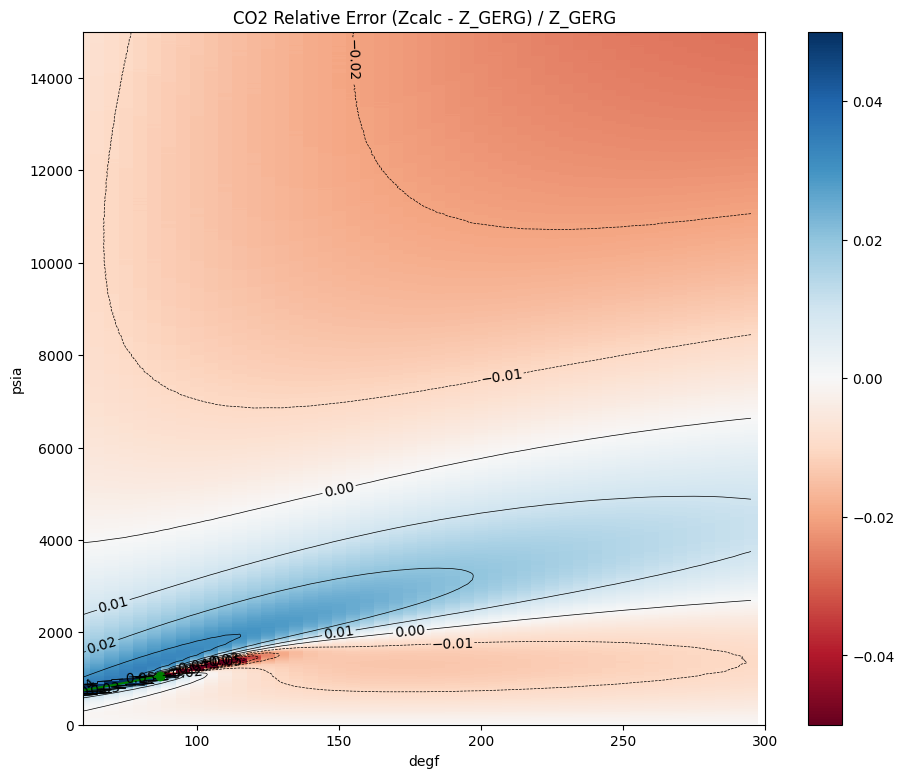

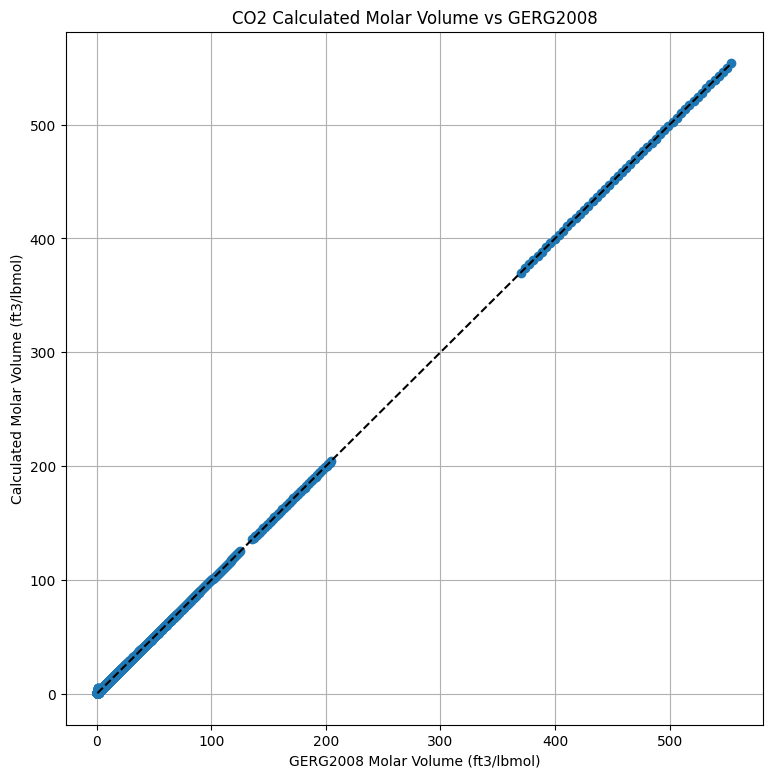

Average Relative error: 0.016240597736604804
95% of data better than error: 0.024905711283333482


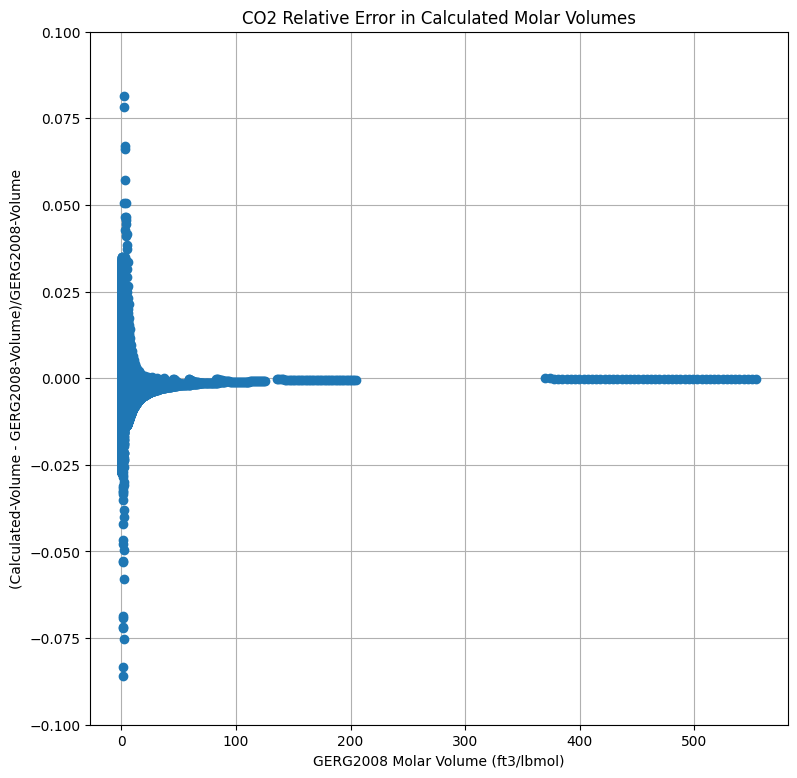

In [5]:
# Compare pure CO2
mwAir = 28.97
mwGas = 44.01
sg = mwGas/mwAir
co2, h2s, n2 = 1.0, 0.0, 0.0
df = pd.read_excel('Z-GERG_CO2.xlsx')#, sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('CO2', [87, 0.000199491, 0.016819666, 5.798738321, 296.0668442])
molar_plots('CO2')

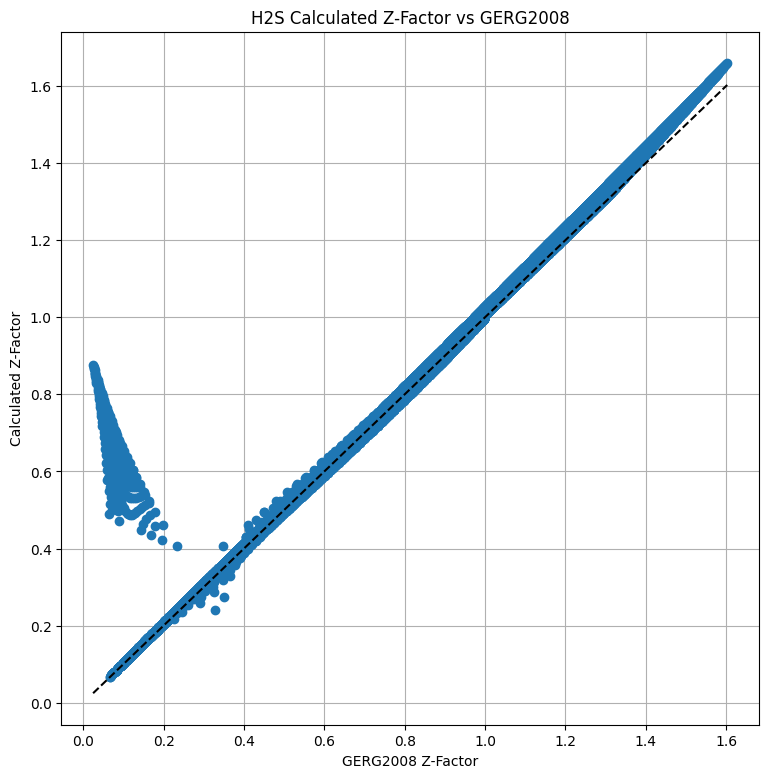

Average Relative error: 0.11702474157238478
95% of data better than error: 0.03195653841958795


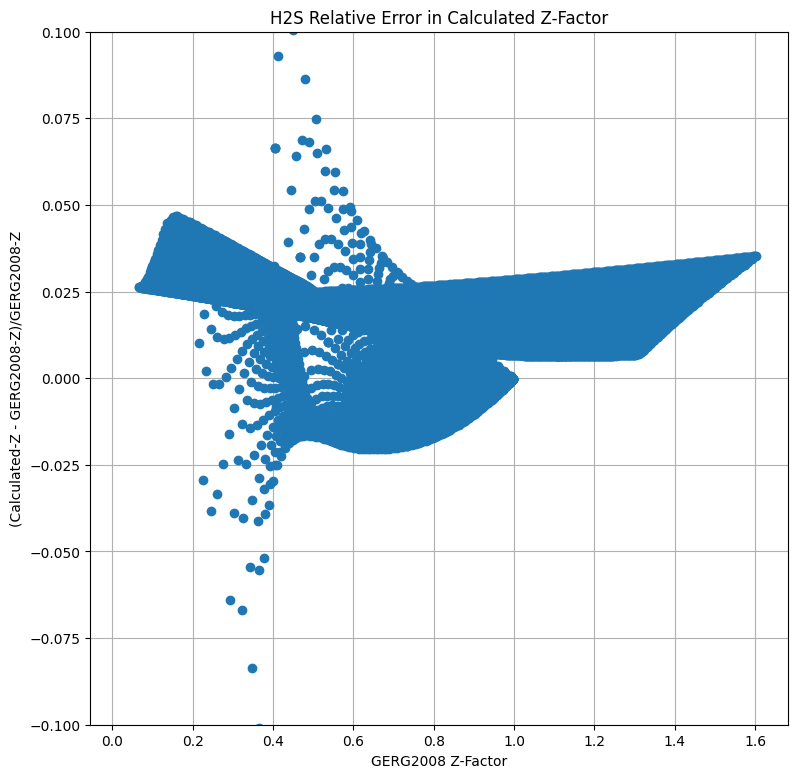

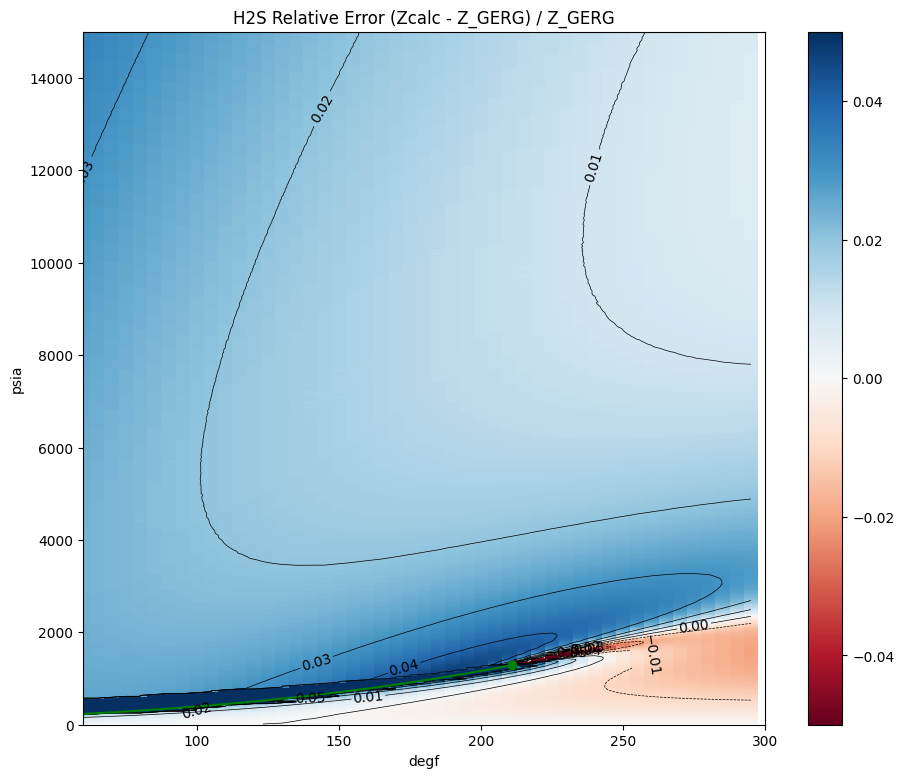

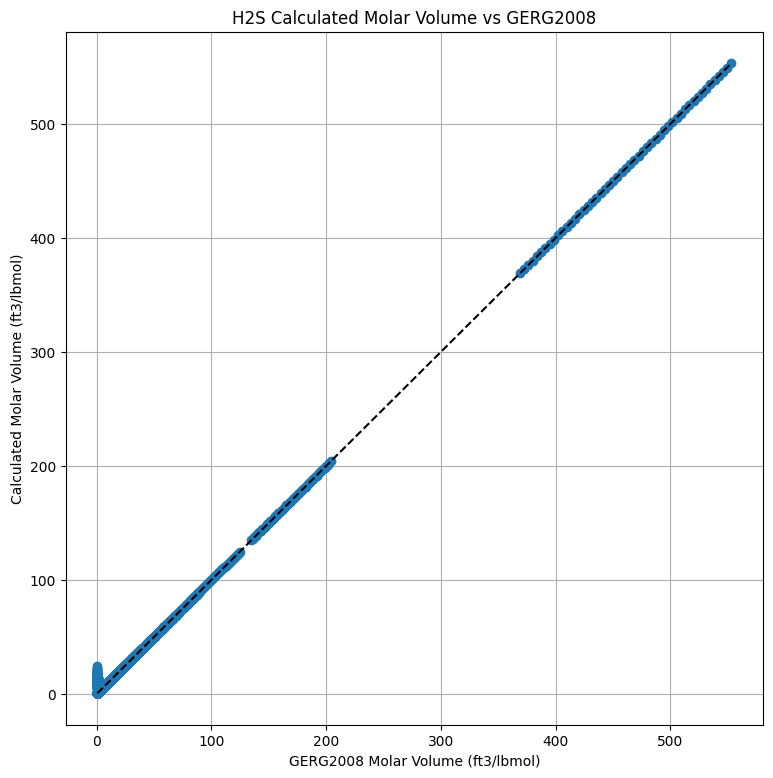

Average Relative error: 0.11702474157238478
95% of data better than error: 0.03195653841958787


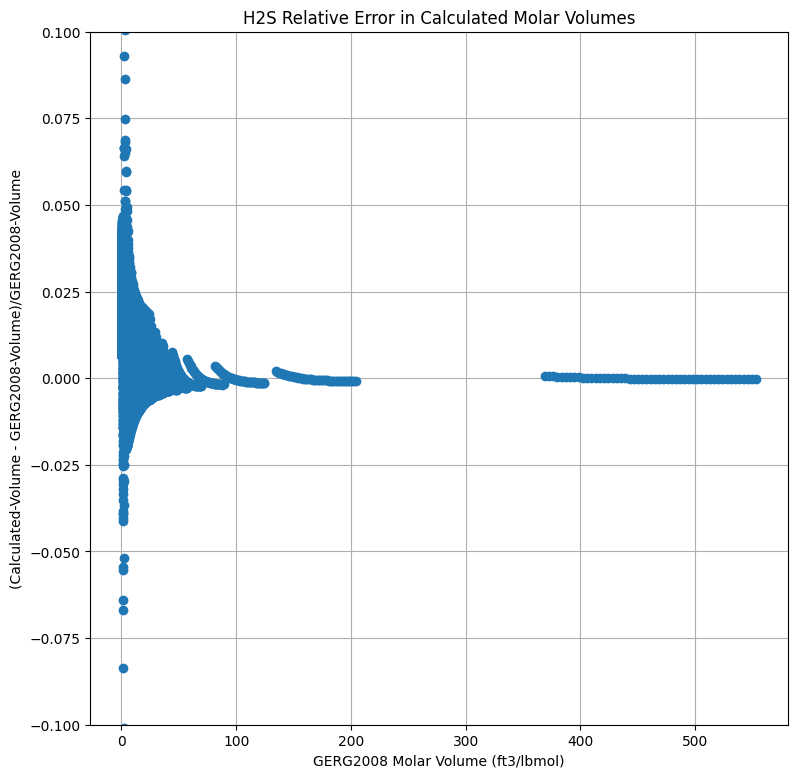

In [6]:
# Compare pure H2S
mwGas = 34.082
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 1.0, 0.0
df = pd.read_excel('Z-GERG_H2S.xlsx')#, sheet_name='H2S')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('H2S', [211, 5.25712E-05, 0.006800431, 1.976840918, 76.61435745])
molar_plots('H2S')

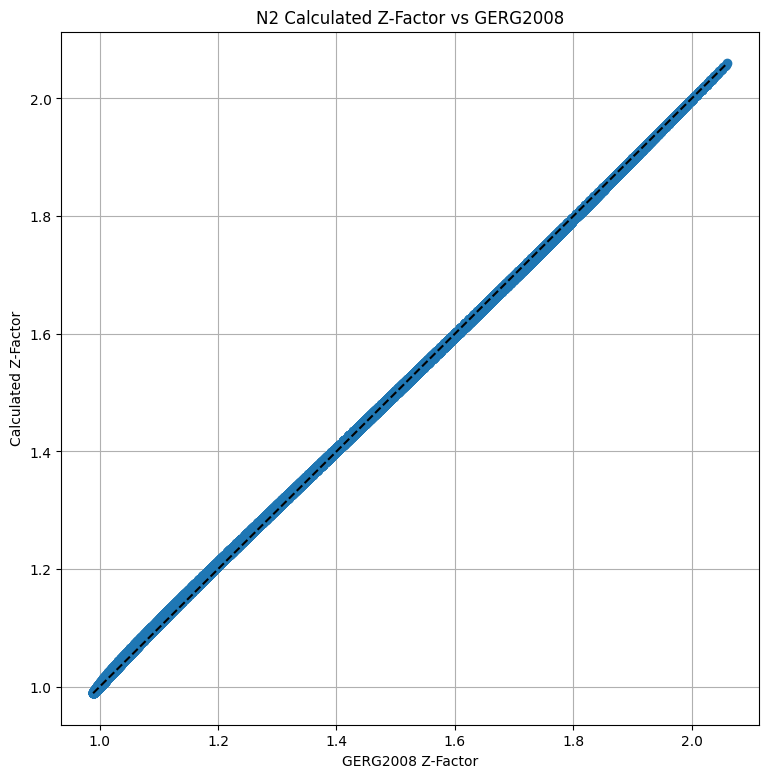

Average Relative error: 0.003741705781978691
95% of data better than error: 0.009723341629353564


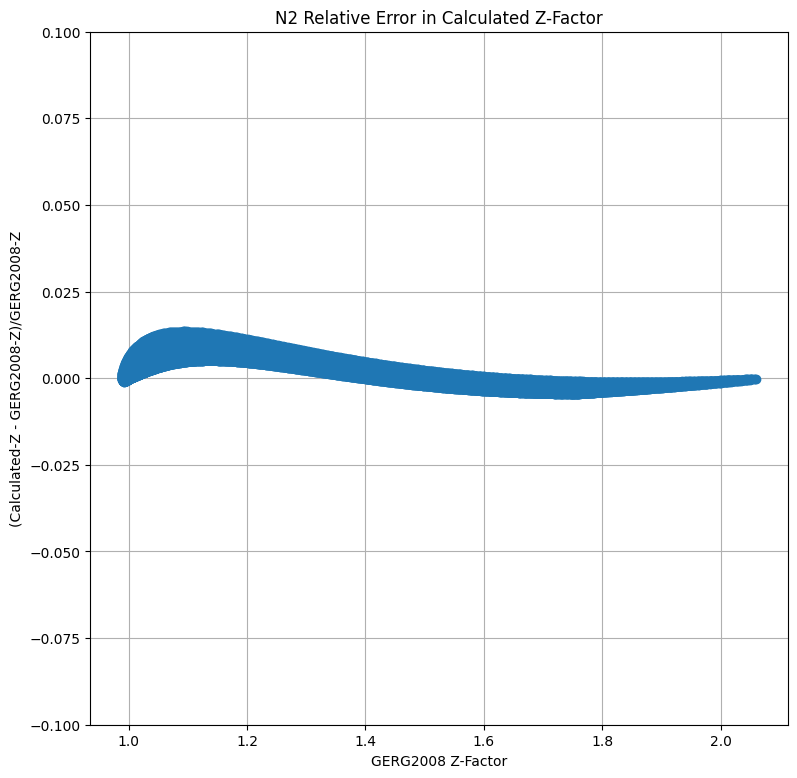

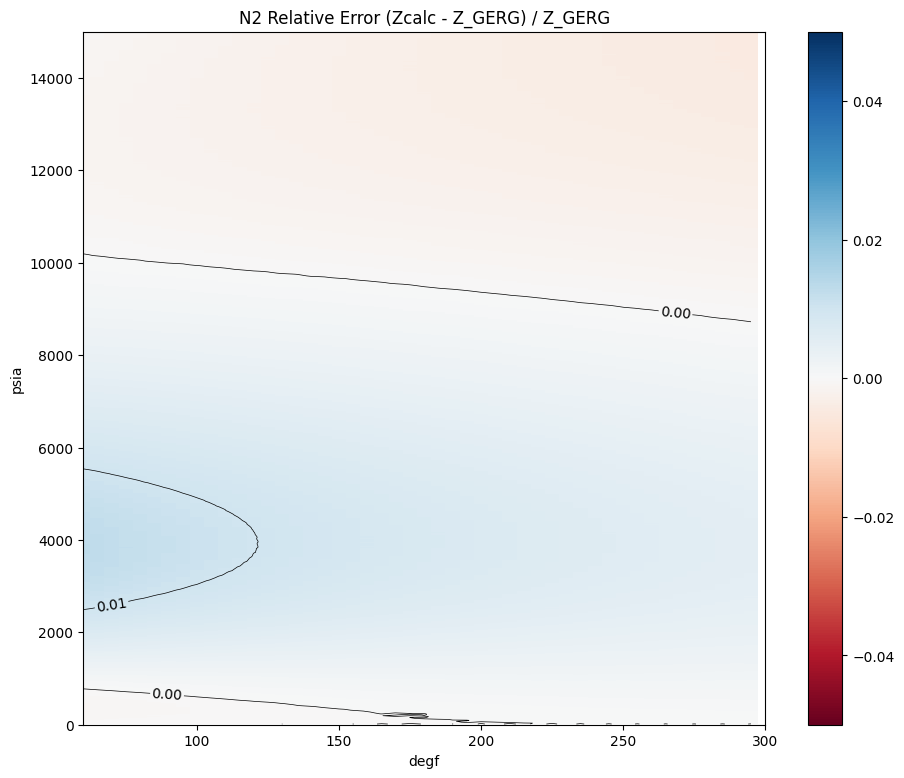

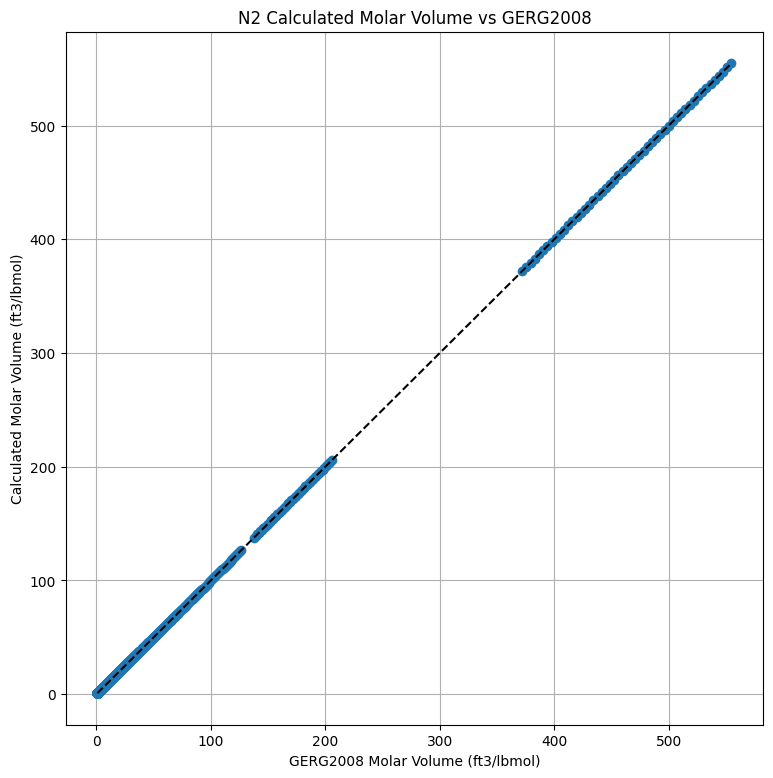

Average Relative error: 0.0037417057819786894
95% of data better than error: 0.009723341629353665


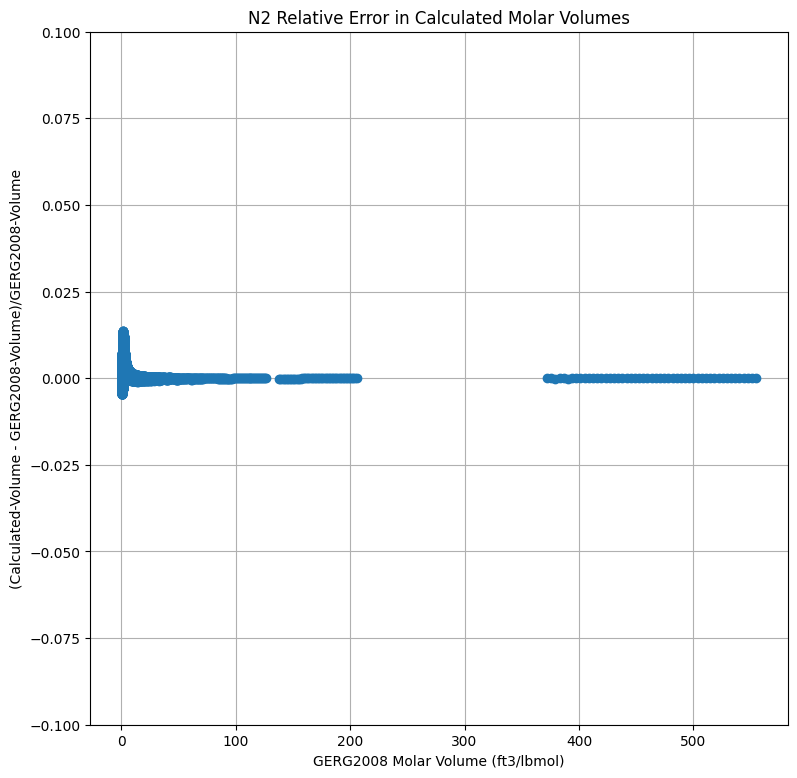

In [7]:
# Compare pure N2
mwGas = 28.014
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 0.0, 1.0
df = pd.read_excel('Z-GERG_N2.xlsx')#, sheet_name='N2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('N2', [-233, 0.000323591, 0.333366681, 114.9031482, 13251.33895])
molar_plots('N2')

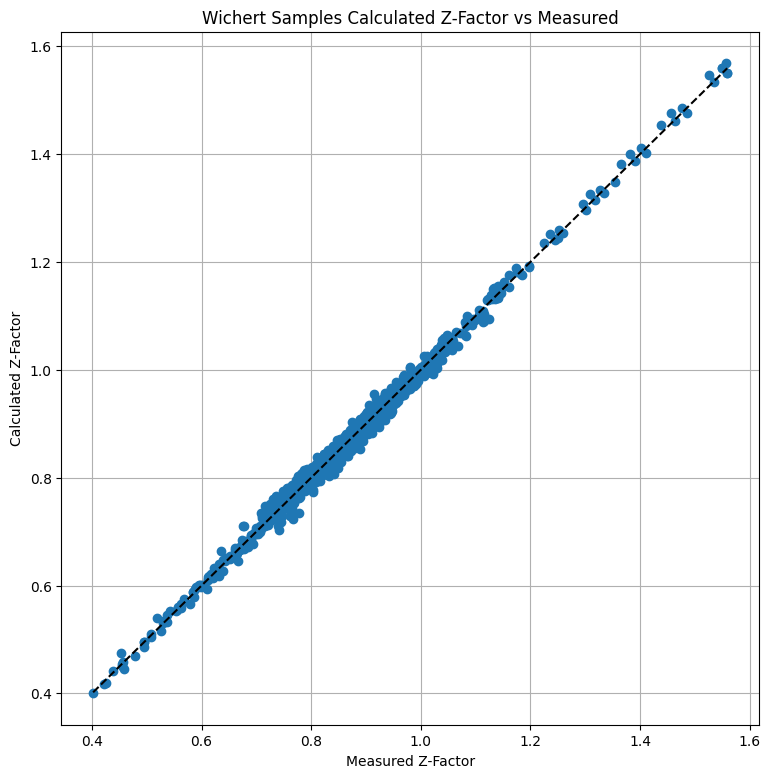

Average Relative error: 0.009757590614751762
99% of data better than error: 0.04112692781577398


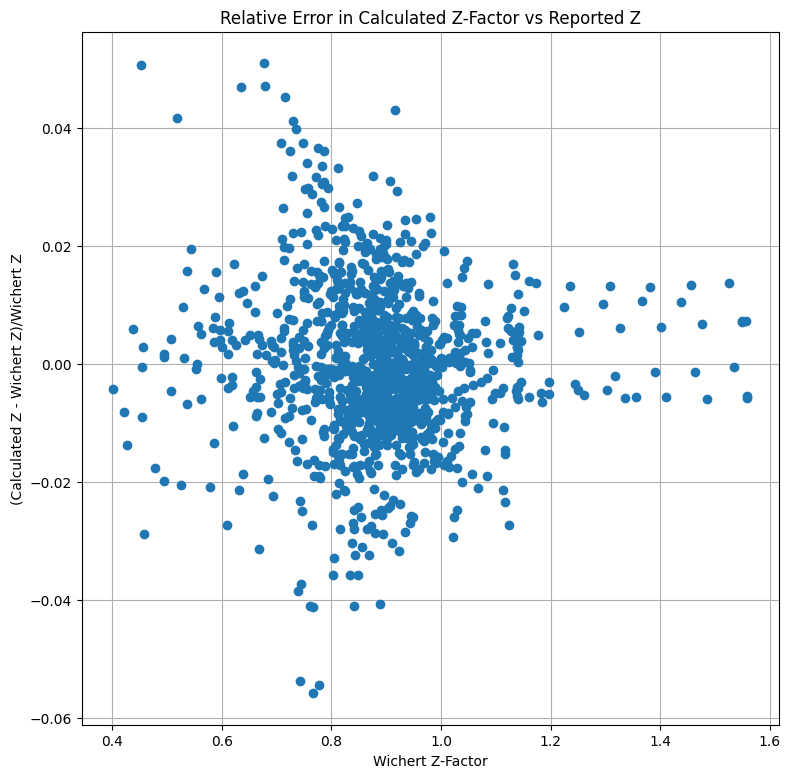

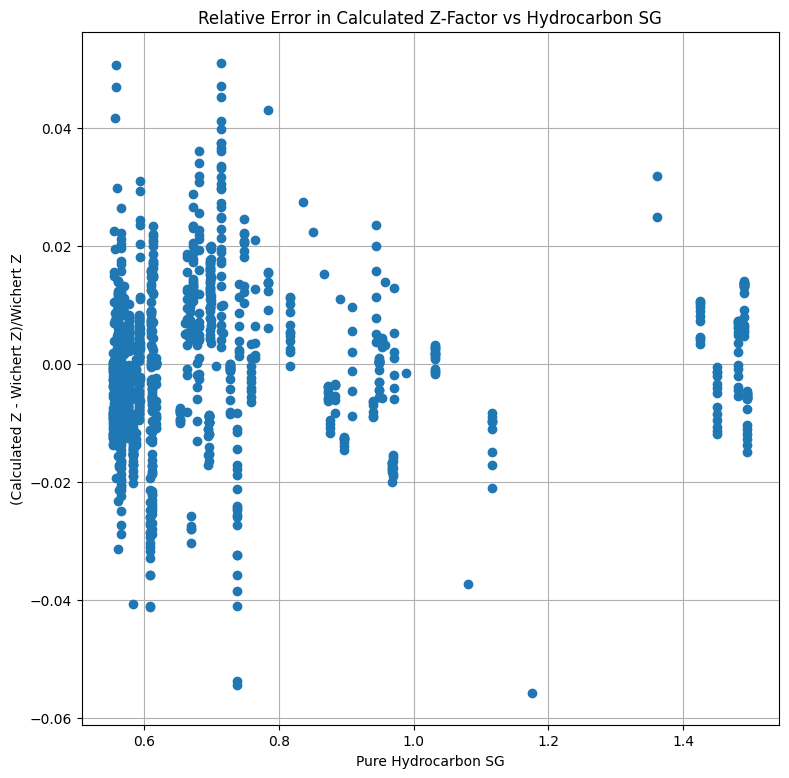

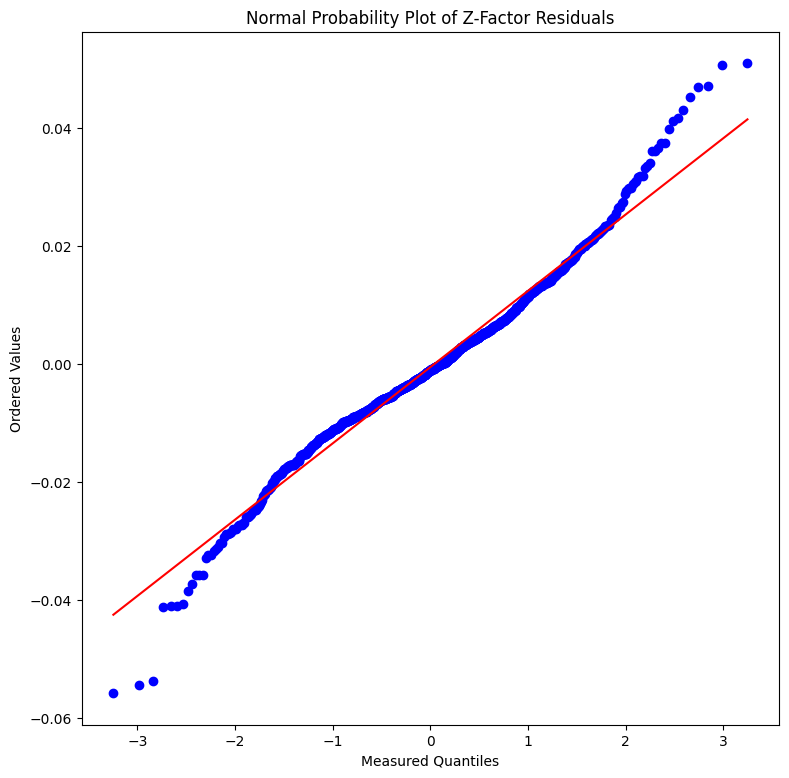

In [8]:
# Compare Wichert data
df = pd.read_excel('Wichert_data_export2.xlsx')

degfs = np.array(df['degf'])
psias = np.array(df['psia'])
sgs = np.array(df['sg'])
co2s = np.array(df['co2'])
h2ss = np.array(df['h2s'])
n2s = np.array(df['n2'])
Zs = np.array(df['Z'])

sg_hc = (sgs - (co2s * 44.01 + h2ss * 34.082 + n2s * 28.014) / mwAir) / (1 - co2s - h2ss - n2s)

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)

z_dak_pmc = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])
z_dak_sut = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])

plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('Wichert Samples Calculated Z-Factor vs Measured')
plt.xlabel('Measured Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.savefig('wichert.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor vs Reported Z')
plt.xlabel('Wichert Z-Factor')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('rel_wichert.png')
plt.show()

plt.plot(sg_hc, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor vs Hydrocarbon SG')
plt.xlabel('Pure Hydrocarbon SG')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('rel_wichert_HC_SG.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of Z-Factor Residuals')
ax.set_xlabel('Measured Quantiles')
ax.set_ylabel('Ordered Values')
plt.savefig('norm_wichert.png')
plt.show()

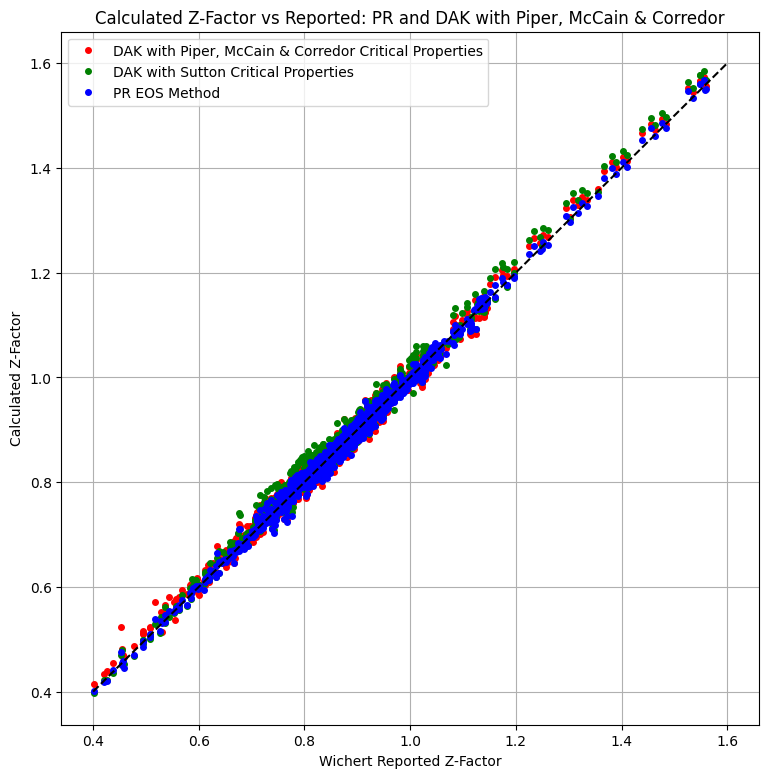

In [9]:
plt.plot(Zs, z_dak_pmc, 'o', c='r', markersize=4, label='DAK with Piper, McCain & Corredor Critical Properties')
plt.plot(Zs, z_dak_sut, 'o', c='g', markersize=4, label='DAK with Sutton Critical Properties')
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='PR EOS Method')
plt.xlabel('Wichert Reported Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.4, 1.6], [0.4, 1.6], '--', c='k')
plt.grid()
plt.title('Calculated Z-Factor vs Reported: PR and DAK with Piper, McCain & Corredor')
plt.legend(loc='upper left')
plt.savefig('Crossplot_Z-PR_DAK.png')
plt.show()

In [10]:
pr_er = (calc_Zs - Zs)/Zs
dak_sut_err = (z_dak_sut - Zs)/Zs
dak_pmc_err = (z_dak_pmc - Zs)/Zs

errs = [pr_er, dak_sut_err, dak_pmc_err]
names = ['Peng Robinson', 'DAK + Sutton & Wichert', 'DAK + PMC']
for e, err in enumerate(errs):
    avg = np.mean(err)
    maxerr = max(err)
    print(names[e], 'Avg Rel. Error: '+str(round(avg, 3))+', Max rel. Error: '+str(round(maxerr, 3))+', 95% Errors less than ', str(round(np.percentile(err, 95),4)))

Peng Robinson Avg Rel. Error: -0.001, Max rel. Error: 0.051, 95% Errors less than  0.0208
DAK + Sutton & Wichert Avg Rel. Error: 0.009, Max rel. Error: 0.097, 95% Errors less than  0.0398
DAK + PMC Avg Rel. Error: 0.005, Max rel. Error: 0.157, 95% Errors less than  0.0356


              degf      psia       co2       h2s        n2     sg_hc  Residual
degf      1.000000  0.379610 -0.113637 -0.126959  0.101128  0.568964  0.004963
psia      0.379610  1.000000 -0.155133 -0.100479  0.033807  0.476700  0.059769
co2      -0.113637 -0.155133  1.000000 -0.155433 -0.054303 -0.127805 -0.024311
h2s      -0.126959 -0.100479 -0.155433  1.000000  0.084189 -0.290272 -0.037242
n2        0.101128  0.033807 -0.054303  0.084189  1.000000  0.088787  0.015688
sg_hc     0.568964  0.476700 -0.127805 -0.290272  0.088787  1.000000  0.053048
Residual  0.004963  0.059769 -0.024311 -0.037242  0.015688  0.053048  1.000000


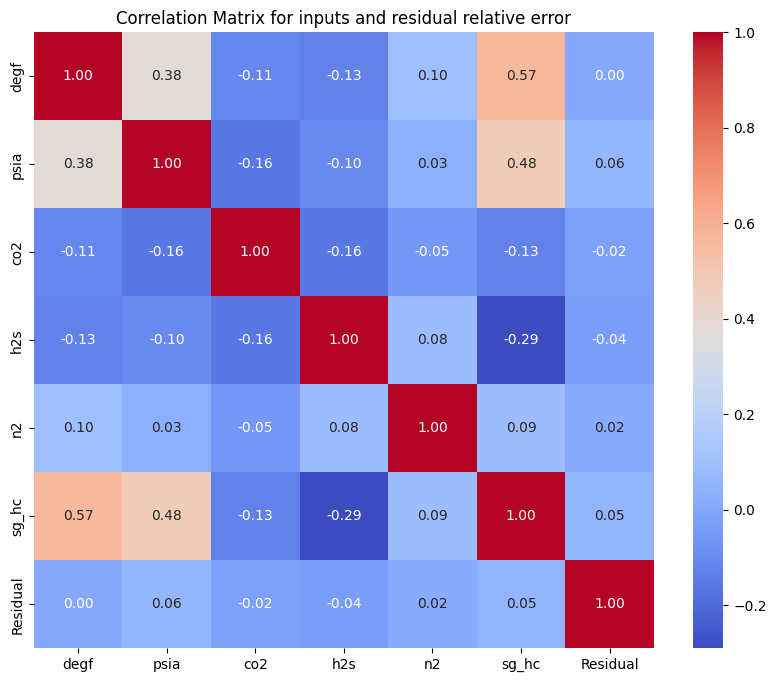

In [11]:
errs = (calc_Zs - Zs)/Zs
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error')
plt.savefig('corel_wichert.png')
plt.show()